# REGRESSION PROJECT - HOUSE PRICES

Background: You are working as an analyst for a real estate company. Your company wants to build a machine learning model to predict the selling prices of houses based on a variety of features on which the value of the house is evaluated.

Objective: The task is to build a model that will predict the price of a house based on features provided in the dataset. The senior management also wants to explore the characteristics of the houses using some business intelligence tool. One of those parameters include understanding which factors are responsible for higher property value - $650K and above. The questions have been provided later in the document for which you can use tableau.

Data: The data set consists of information on some 22,000 properties.  The dataset consisted of historic data of houses sold between May 2014 to May 2015. These are the definitions of data points provided: (Note: For some of the variables that are self explanatory, no definition has been provided)

## Notes for next project
- Replace manual steps using more and more functions (data cleaning)
- Study and understand topic better

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

import math
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
data = pd.read_csv(r"C:\Users\nicol\mid-bootcamp-project\mid-bootcamp-project-1\regression\data\regression_data.csv")

## Review and Clean Data

### First Review

In [3]:
data.shape

(21597, 21)

In [4]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
## TODO - add description of different columns here as table

In [6]:
data.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [8]:
data.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [9]:
# check unique values present in dataset

for col in data:
    print(data[col].value_counts(), '\n')
    
# id is not a unique number -> to investigate further what it means to have one listing of an id several times
# convert date to date
# waterfront yes or no
# view is stored in some kind of scoring 0-4
# condition is stored in some kind of scoring 1-5
# grade is stored in some kind of scoring 3-13
# null value within yr_renovation represents that the house has not been renovated
# as we already have the zip code I assume we can drop latitude and longitude

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64 

6/23/14    142
6/25/14    131
6/26/14    131
7/8/14     127
4/27/15    126
          ... 
5/15/15      1
5/27/15      1
8/30/14      1
5/24/15      1
1/31/15      1
Name: date, Length: 372, dtype: int64 

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64 

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64 

1300   

In [10]:
## TODO add table of different data here and explain how to clean data

### Standardizing of Names (e.g. snakecase)

No standardization of column names is required

### Deal with ID column

The id column shows many not unique values. <br>
Some houses are listed more than once with different prices all other data seems to be unchanged <br>
There are two possibilities from my perspective: <br>
(1) either those houses have been sold twice within a short time <br>
(2) houses have been listed twice <br>
As I don't know which is right I will remove the older listing and just work with the latest one.<br>

In [11]:
# check not unique ids

data[data.duplicated(subset=['id'],keep=False)].sort_values(by=['id'])

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
2495,1000102,4/22/15,6,3.00,2400,9373,2.0,0,0,3,...,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,300000
2494,1000102,9/16/14,6,3.00,2400,9373,2.0,0,0,3,...,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,280000
16800,7200179,10/16/14,2,1.00,840,12750,1.0,0,0,3,...,840,0,1925,0,98055,47.4840,-122.211,1480,6969,150000
16801,7200179,4/24/15,2,1.00,840,12750,1.0,0,0,3,...,840,0,1925,0,98055,47.4840,-122.211,1480,6969,175000
11422,109200390,10/20/14,3,1.75,1480,3900,1.0,0,0,4,...,1480,0,1980,0,98023,47.2977,-122.367,1830,6956,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339,9828200460,6/27/14,2,1.00,700,4800,1.0,0,0,3,...,700,0,1922,0,98122,47.6147,-122.300,1440,4800,260000
15186,9834200305,2/10/15,3,1.00,1790,3876,1.5,0,0,5,...,1090,700,1904,0,98144,47.5750,-122.288,1360,4080,615000
15185,9834200305,7/16/14,3,1.00,1790,3876,1.5,0,0,5,...,1090,700,1904,0,98144,47.5750,-122.288,1360,4080,350000
1084,9834200885,7/17/14,4,2.50,2080,4080,1.0,0,0,5,...,1040,1040,1962,0,98144,47.5720,-122.290,1340,4080,360000


In [12]:
# drop double listings of houses

data = (data.sort_values(by=['id', 'date'], ascending=True).drop_duplicates(subset='id', keep= 'first').reset_index(drop=True))

In [13]:
# set id as index column

data = data.set_index('id')

### Deal with year columns

Both year columns cannot be used as is in my model. <br>
(1) though they are currently listed as dtype numerical they are not of numerical nature <br>
(2) as is they would blow up my database if I encode them as categorical variables

In [14]:
# use categories from Tableau exercise

conditions = [
    ((data["yr_built"] >= 1900) & (data["yr_built"] < 1930)),
    ((data["yr_built"] >= 1930) & (data["yr_built"] < 1960)),
    ((data["yr_built"] >= 1960) & (data["yr_built"] < 1990)),
    ((data["yr_built"] >= 1990) & (data["yr_built"] <= 2015))
]

values = ['A', 'B', 'C', 'D']

data["yr_built_cat"] = np.select(conditions, values)

In [15]:
data

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,yr_built_cat
id,,,,,,,,,,,,,,,,,,,,,
1000102,4/22/15,6,3.00,2400,9373,2.0,0,0,3,7,...,0,1991,0,98002,47.3262,-122.214,2060,7316,300000,D
1200019,5/8/14,4,1.75,2060,26036,1.0,0,0,4,8,...,900,1947,0,98166,47.4444,-122.351,2590,21891,647500,B
1200021,8/11/14,3,1.00,1460,43000,1.0,0,0,3,7,...,0,1952,0,98166,47.4434,-122.347,2250,20023,400000,B
2800031,4/1/15,3,1.00,1430,7599,1.5,0,0,4,6,...,420,1930,0,98168,47.4783,-122.265,1290,10320,235000,B
3600057,3/19/15,4,2.00,1650,3504,1.0,0,0,3,7,...,890,1951,2013,98144,47.5803,-122.294,1480,3504,402500,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842300095,7/25/14,5,2.00,1600,4168,1.5,0,0,3,7,...,0,1927,0,98126,47.5297,-122.381,1190,4168,365000,A
9842300485,3/11/15,2,1.00,1040,7372,1.0,0,0,5,7,...,200,1939,0,98126,47.5285,-122.378,1930,5150,380000,B
9842300540,6/24/14,3,1.00,1100,4128,1.0,0,0,4,7,...,380,1942,0,98126,47.5296,-122.379,1510,4538,339000,B


### Drop Duplicates

Drop duplicate rows if present. We already know there cannot be any duplicates anymore because we removed all id duplicates.

In [16]:
data.shape

(21420, 21)

In [17]:
data = data.drop_duplicates()

In [18]:
data.shape

(21420, 21)

### Drop columns

In [19]:
data = data.drop(['date', 'lat', 'long', 'yr_built'], axis=1)

In [20]:
data.shape

(21420, 17)

### Change dtypes

In [21]:
# change dtypes for categorical numerical columns

# waterfront is a boolean column (1=waterfront, 0=no waterfront)
# view is a categorical column with some kind of scoring
# condition is a categorical column with some kind of scoring
# grade is a categorical column with some kind of scoring
# zipcode is a categorical column which represents a location

data = data.astype({'waterfront':'boolean','zipcode':'object'})

In [22]:
data.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       boolean
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_renovated       int64
zipcode           object
sqft_living15      int64
sqft_lot15         int64
price              int64
yr_built_cat      object
dtype: object

### Null and zero values

In [23]:
# no null values present in the dataset

data.isna().any()

bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_renovated     False
zipcode          False
sqft_living15    False
sqft_lot15       False
price            False
yr_built_cat     False
dtype: bool

In [24]:
# no null values present in the dataset

data.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
price            0
yr_built_cat     0
dtype: int64

In [25]:
# explain the purpose of zero values in certain columns

### Review cleaned dataset

In [26]:
data.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,price
count,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,2.142000e+04
mean,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.235107,3.410784,7.662792,1791.170215,291.962418,84.793091,1988.384080,12775.718161,5.415246e+05
std,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.767165,0.650035,1.171971,828.692965,442.875502,402.574626,685.537057,27345.621867,3.676780e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,0.000000,399.000000,651.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,0.000000,1490.000000,5100.000000,3.242700e+05
50%,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,0.000000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,0.000000,2370.000000,10086.250000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,6210.000000,871200.000000,7.700000e+06


In [27]:
# correlation matrix

data.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,price
bedrooms,1.000000,0.515383,0.579069,0.032490,0.177734,-0.006940,0.080019,0.025893,0.357988,0.480242,0.302748,0.017977,0.394949,0.030570,0.309487
bathrooms,0.515383,1.000000,0.755522,0.087779,0.501803,0.063734,0.187336,-0.129362,0.665587,0.686328,0.283205,0.050904,0.569453,0.087760,0.525504
sqft_living,0.579069,0.755522,1.000000,0.172586,0.352868,0.103938,0.283851,-0.061677,0.762477,0.876533,0.434505,0.055028,0.756186,0.183837,0.701462
sqft_lot,0.032490,0.087779,0.172586,1.000000,-0.005561,0.021599,0.075203,-0.009169,0.113656,0.183210,0.015239,0.007679,0.143805,0.717743,0.088806
floors,0.177734,0.501803,0.352868,-0.005561,1.000000,0.023530,0.027575,-0.266859,0.458091,0.522751,-0.246078,0.005714,0.279071,-0.011367,0.255327
waterfront,-0.006940,0.063734,0.103938,0.021599,0.023530,1.000000,0.403140,0.016564,0.082955,0.072055,0.080808,0.093013,0.086602,0.030772,0.266987
view,0.080019,0.187336,0.283851,0.075203,0.027575,0.403140,1.000000,0.045059,0.250298,0.166889,0.276613,0.103667,0.279320,0.073199,0.396766
condition,0.025893,-0.129362,-0.061677,-0.009169,-0.266859,0.016564,0.045059,1.000000,-0.150508,-0.161483,0.174204,-0.061308,-0.095256,-0.003450,0.034351
grade,0.357988,0.665587,0.762477,0.113656,0.458091,0.082955,0.250298,-0.150508,1.000000,0.756221,0.166854,0.014201,0.713178,0.120056,0.667154
sqft_above,0.480242,0.686328,0.876533,0.183210,0.522751,0.072055,0.166889,-0.161483,0.756221,1.000000,-0.052672,0.022630,0.731887,0.194445,0.604646


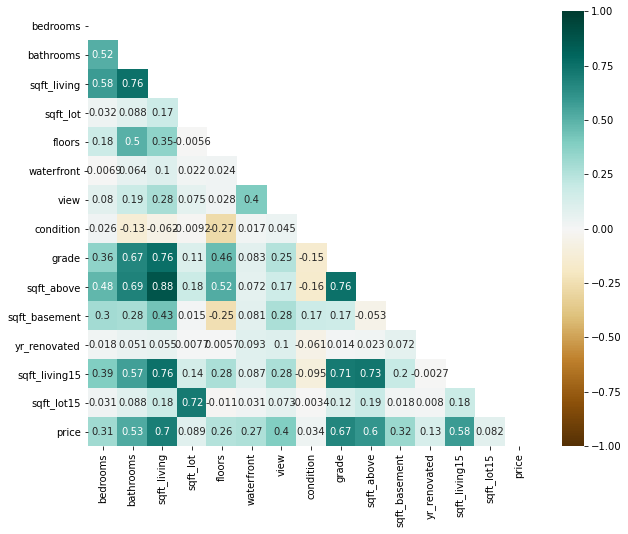

In [28]:
# create correlation heatmap 

mask = np.zeros_like(data.corr())

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

plt.show()

In [29]:
data.shape

(21420, 17)

In [30]:
# split in numerical and categorical variables (withou outliers removed)

X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = object)

## Outliers

### Visually Check for Outliers

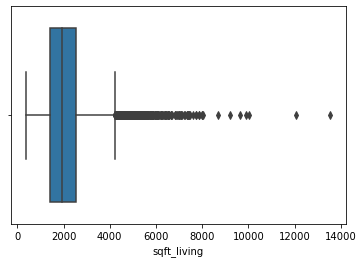

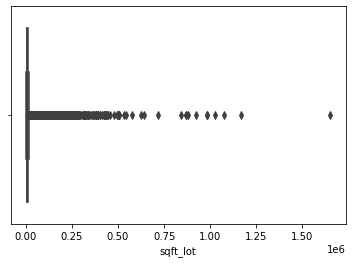

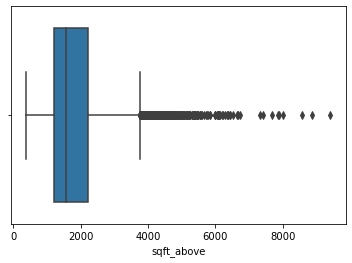

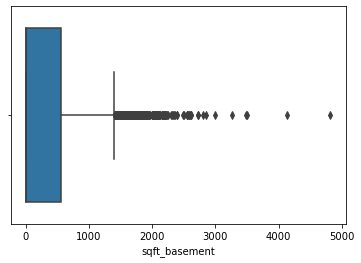

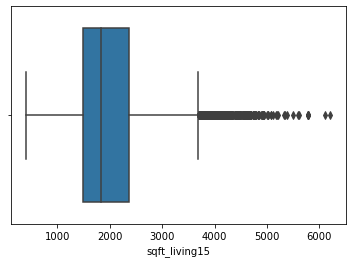

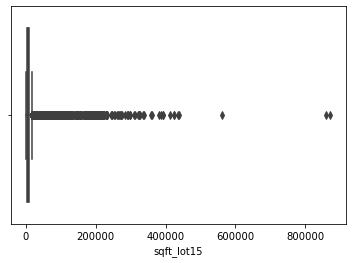

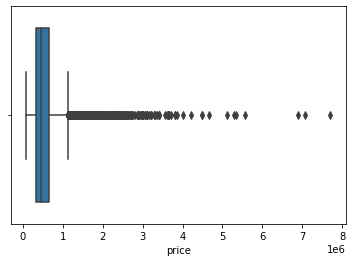

In [49]:
for column in data.select_dtypes(np.number).columns:
    sns.boxplot(data[column])
    plt.show()

### First try - threshold 1.25 on all variables that contain Outliers

In [50]:
def remove_outliers(data, threshold=1.25, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

In [51]:
data1 = remove_outliers(data, threshold=1.25, in_columns=['sqft_living', 'sqft_lot', 'sqft_above','sqft_basement', 'sqft_living15', 'sqft_lot15', 'price'])

In [52]:
data1.shape

(15443, 17)

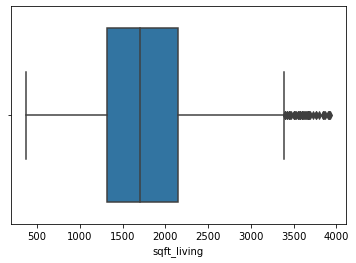

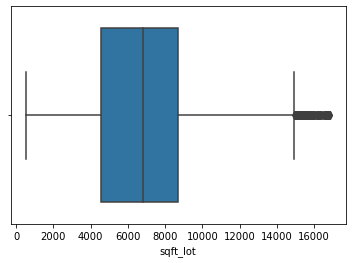

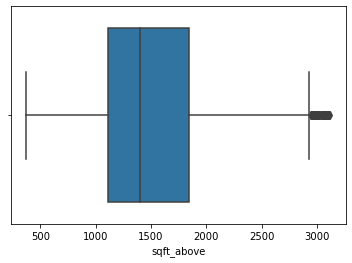

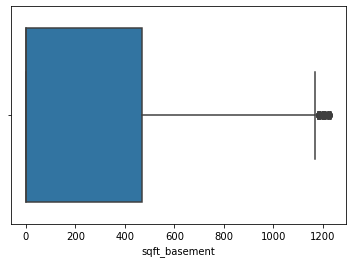

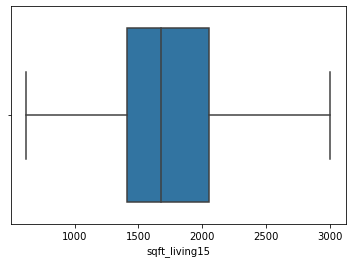

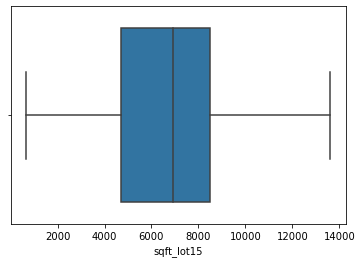

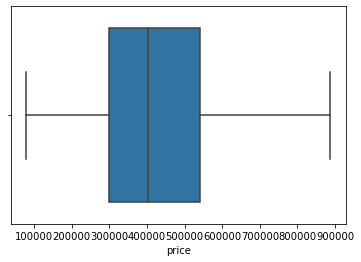

In [53]:
for column in data1.select_dtypes(np.number).columns:
    sns.boxplot(data1[column])
    plt.show()

threshold of 1.25 for price, sqft_lot15 and sqft_living15 seems to work well <br>
let's increase it for the other values

### Second try with 0.75 thresholds on all variables

In [54]:
def remove_outliers2(data, threshold=0.75, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

In [55]:
data2 = remove_outliers2(data, threshold=0.75, in_columns=['sqft_living', 'sqft_lot', 'sqft_above','sqft_basement'])

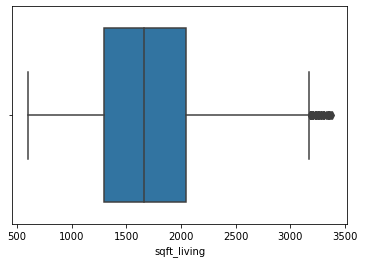

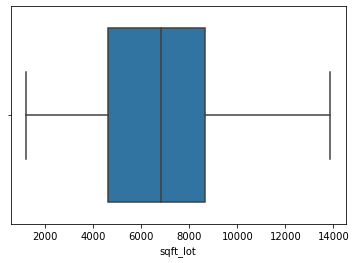

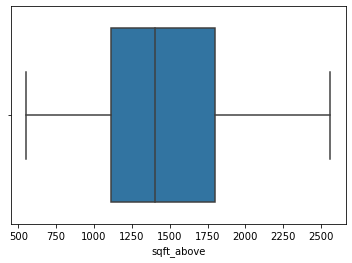

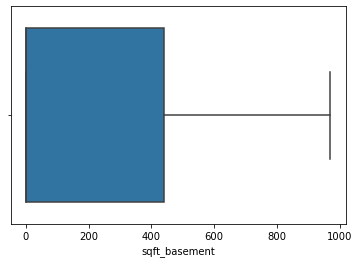

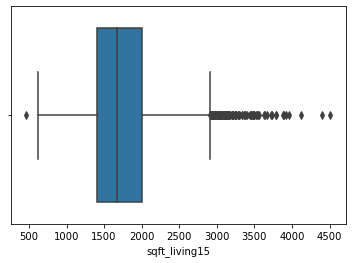

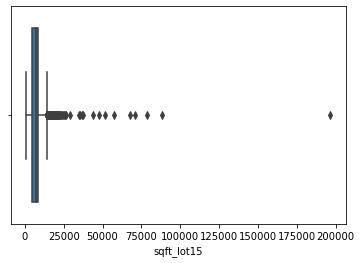

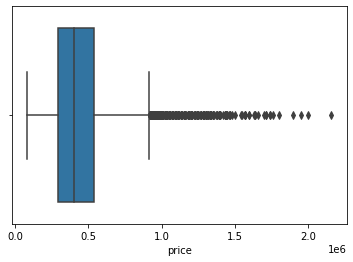

In [56]:
for column in data2.select_dtypes(np.number).columns:
    sns.boxplot(data2[column])
    plt.show()

### Thrid try with different thresholds on all variables

In [57]:
def remove_outliers3(data, threshold=0.1, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

In [58]:
data3 = (remove_outliers3(data, threshold=0.1, in_columns=['sqft_living']))
data4 = (remove_outliers2(data3, threshold=0.75, in_columns=['sqft_living', 'sqft_lot', 'sqft_above','sqft_basement']))
data5 = (remove_outliers(data4, threshold=1.25, in_columns=[ 'sqft_living15', 'sqft_lot15', 'price']))

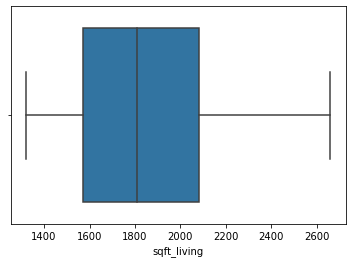

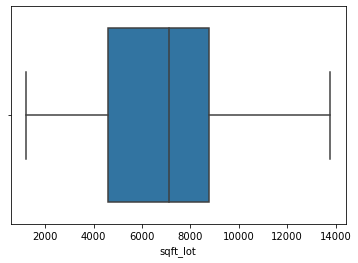

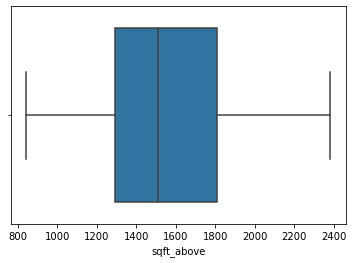

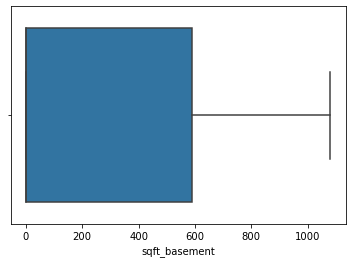

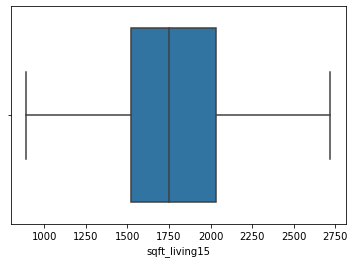

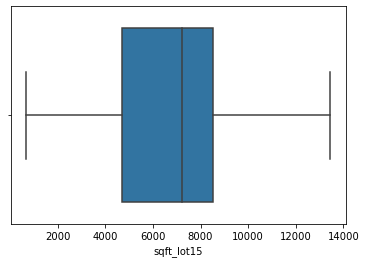

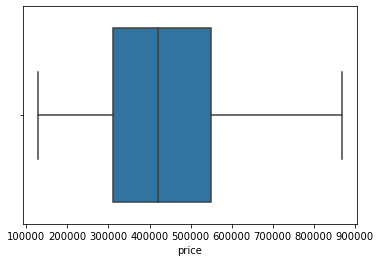

In [60]:
for column in data5.select_dtypes(np.number).columns:
    sns.boxplot(data5[column])
    plt.show()

In [62]:
# rename an backup
data_wo_outliers = data5

In [65]:
data_wo_outliers.shape

# only 8895 rows from 21420 rows are left (41,52%)

(8895, 17)

In [67]:
# split in numerical and categorical variables (outliers removed)

X_num_2 = data_wo_outliers.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = object)

In [ ]:
# learnings after trying different methods to remove outliers


## Normalize Data

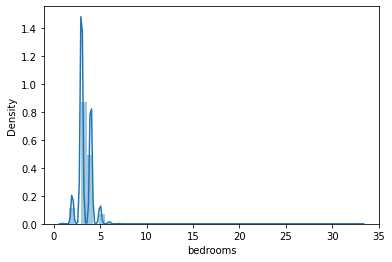

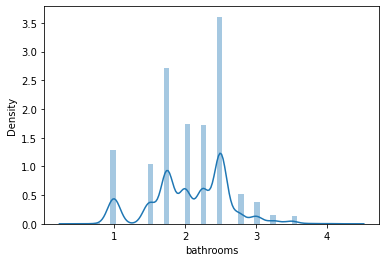

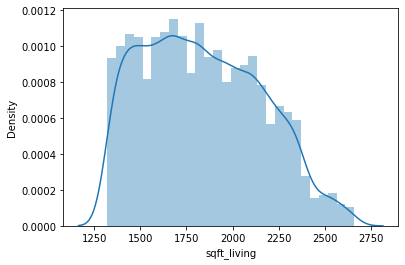

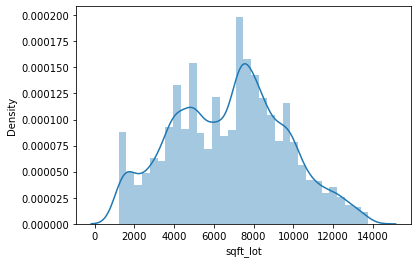

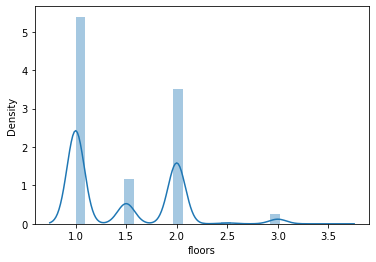

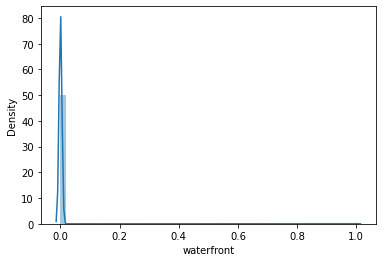

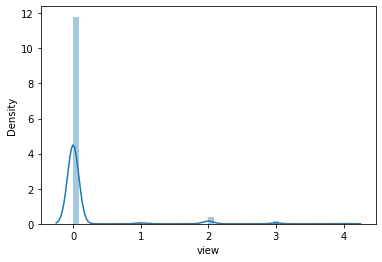

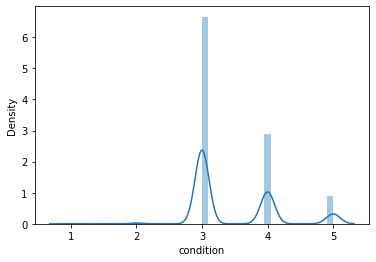

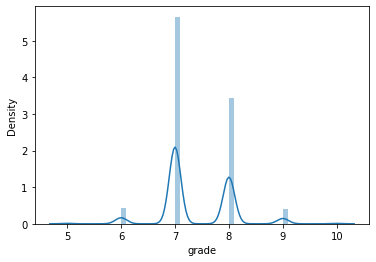

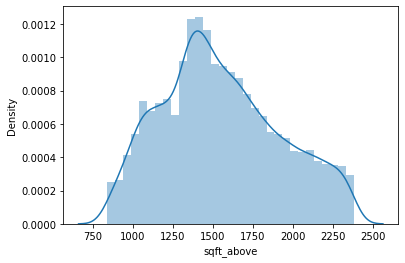

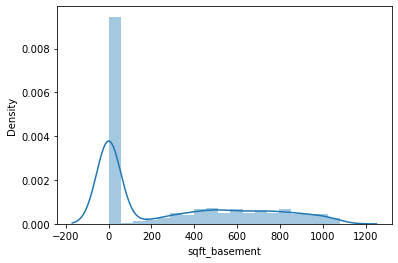

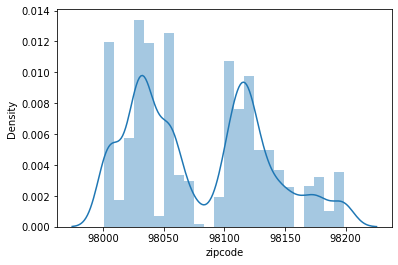

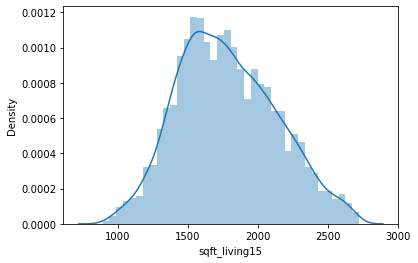

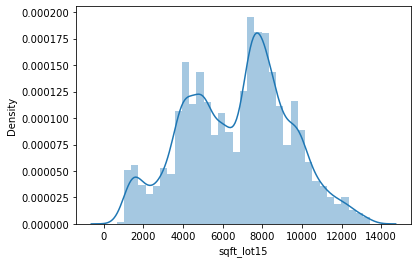

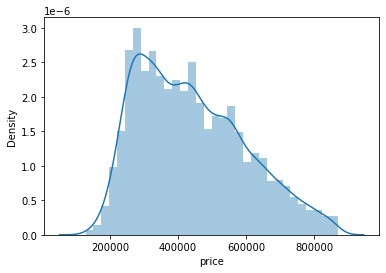

ValueError: could not convert string to float: 'B'

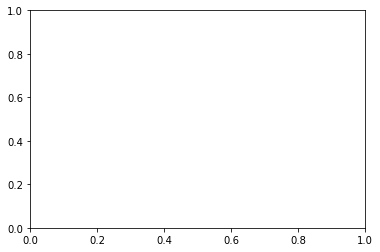

In [472]:
# checking distribution of our data (still part of the EDA)
# the data is skewed (right/positive skew)
for column in data_wo_outliers.columns:
    sns.distplot(data_wo_outliers[column])
    plt.show()

In [451]:
# checking distribution after normalization
for column in x_normalized.columns:
    sns.distplot(x_normalized[column])
    plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

## variance inflation factor

A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model. <br>
Detecting multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables. <br>
A large variance inflation factor (VIF) on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables. <br>

https://www.investopedia.com/terms/v/variance-inflation-factor.asp

## Encode Categorical Variables

In [31]:
X_cat = pd.get_dummies(X_cat, drop_first=True)

In [32]:
X_cat

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,yr_built_cat_B,yr_built_cat_C,yr_built_cat_D
id,,,,,,,,,,,,,,,,,,,,,
1000102,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1200019,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1200021,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2800031,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3600057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842300095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9842300485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9842300540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Join all data for test/train split

In [33]:
X_num.shape

(21420, 14)

In [34]:
X_cat.shape

(21420, 72)

In [35]:
model_df = pd.merge(X_cat, X_num, left_index=True, right_index=True)

In [36]:
model_df.shape

(21420, 86)

In [37]:
model_df

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,floors,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,,,
1000102,1,0,0,0,0,0,0,0,0,0,...,2.0,0,3,7,2400,0,0,2060,7316,300000
1200019,0,0,0,0,0,0,0,0,0,0,...,1.0,0,4,8,1160,900,0,2590,21891,647500
1200021,0,0,0,0,0,0,0,0,0,0,...,1.0,0,3,7,1460,0,0,2250,20023,400000
2800031,0,0,0,0,0,0,0,0,0,0,...,1.5,0,4,6,1010,420,0,1290,10320,235000
3600057,0,0,0,0,0,0,0,0,0,0,...,1.0,0,3,7,760,890,2013,1480,3504,402500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842300095,0,0,0,0,0,0,0,0,0,0,...,1.5,0,3,7,1600,0,0,1190,4168,365000
9842300485,0,0,0,0,0,0,0,0,0,0,...,1.0,0,5,7,840,200,0,1930,5150,380000
9842300540,0,0,0,0,0,0,0,0,0,0,...,1.0,0,4,7,720,380,0,1510,4538,339000


## Model

In [38]:
## x\y split

X = model_df.drop('price', axis=1)
y = model_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
predictions  = model.predict(X_test)
predictions.shape

(6426,)

## Evaluation of different models

### Outliers not removed, no normalization, dummy encoded categoricals (21420 rows × 141 columns)

In [41]:
# with outliers, non-normalized and dummy encoded data
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.7933412939991832, 166757.46224136534, 27808051213.18039)

r2_score: <br>
MSE: <br>
RMSE: <br>

### Outliers not removed, log transformed, dummy encoded categoricals (21420 rows × 141 columns)

### Outliers removed, no normalization, dummy encoded categoricals (21420 rows × 141 columns)

### Outliers removed, no normalization, dummy encoded categoricals (21420 rows × 141 columns)

### Outliers removed, no normalization, dummy encoded categoricals (21420 rows × 141 columns)

## KNN Model

In [ ]:
for i in [10, 20, 30, 40, 50]

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
scores = []
for i in range(2,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

## Evaluate Quality of the Model

In [ ]:
# Comparison of actual vs predicted value as a bar graph (100 values)

df1 = df.head(100)
df1.plot(kind = 'bar', figsize = (16,7))
plt.show()

In [493]:
# Analyzing results
# hint: to analyse your results, it might be a good idea to add your predictions to your dataframe
# visually evaluate model

sns.regplot(X['price'], y, line_kws={"color": "red"})

KeyError: 'price'

## Conclusion